<a href="https://colab.research.google.com/github/Sptfff/ADA-Informes/blob/main/Informe10_ProblemaMochila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Descripción del Problema de la Mochila

El problema de la mochila consiste en buscar la forma más eficiente de llenar una mochila, un ejemplo común es donde se busca llenar la mochila con una serie de objetos de valor, pero cada uno tiene un peso propio, mientras que la mochila posee una capacidad de peso limitada, por lo que se busca conseguir la mayor ganancia sin sobrepasar la capacidad de la mochila.

![image](https://imgur.com/eWI6TdV.jpg)

Para solucionar este tipo de problemas haremos uso de 2 algoritmos, el primero se basa en la programación dinámica (la cual ya se vio en informes previos) y el segundo será un algoritmo Greedy (voraz).

##¿Que es un algoritmo Greedy?

Los algoritmos Greedys consisten en usar la solución más conveniente en el momento, en comparación con otro tipo de algoritmos como los dinámicos, donde estos, se podría decir que buscar entre todas las soluciones posibles (de manera eficiente dentro de lo que cabe) para retornar la "mejor", mientras que los greedy's buscan el mejor resultado aparente sin importar que sea el mejor.

Generalmente las elecciones que realizan estos algoritmo no son las más optimas, pero en los casos promedios el resultado es bastante "bueno" y se consigue en un tiempo razonable, por esto los greedy's son bastantes usados.

#Descripción de los algoritmos

##Descripción Algoritmo Greedy

Como ya se había mencionado los algoritmo greedys toman la decisión que en el momento parece ser la mejor, en el caso de esta implementación el algoritmo no siempre retornará el resultado óptimo debido a que lo anterior "impide" que consideré otros escenarios mejores. 

Como descripción general, esta implementación lo que hace es comparar el ratio de cada elemento (el ratio es el precio dividido por el peso) con el ratio anterior, y se guarda el mayor entre estos, cuando se hayan recorrido los elementos, se guarda el ultimo elemento con mayor ratio.

Esta implementación se podría decir que es simple, pero los resultado que retorna generalmente estan cerca del que sería el correcto, pero siendo obtenido en un tiempo lineal y sin ocupar estructuras adicionales.

##Descripción Algoritmo Dinámico

Los algoritmo dinámicos consisten en resolver sub-problemas y guardar las soluciones, y reutilizarlas en otros sub-problemas donde aparezcan los que ya fueron solucionados, lo que reduce en gran medida su tiempo de ejecución en comparación con otros algoritmos recursivos.

En el caso de esta implementación, lo que hace es crear una matriz donde guardará los valores máximos de distintas combinaciones de elementos, en caso de que estos sub-problemas se repitan, el algoritmo ya los tiene calculados por lo que no es necesario que lo vuelva a hacer.

Debido a la matriz, este algoritmo posee una complejidad espacial de $O(n*W)$ donde $n$ es el total de elementos y $W$ el peso total que aguanta la mochila.




#Código Dinámico

In [35]:
import random
from termcolor import colored


def mochilaDina(pesoTotal, pesos, precios, largo, cont, verbose = False):
  aux = [[0 for i in range(pesoTotal+1)] for j in range(largo+1)]

  if(verbose == True):
    print(colored(f"Se crea un arreglo auxiliar: {aux}", "blue"))

  for i in range(largo+1):
    for j in range(pesoTotal+1):
      cont[0]+= 1
      
      if(i == 0 or j == 0):
        aux[i][j] = 0
      else:
        if(verbose == True):
          print(colored(f"\níndices: {i}, {j}\nSe pregunta si el valor del arreglo de precios es menor a {j}", "magenta"))

        if(pesos[i-1] <= j):
          if(verbose == True):
            print(colored(f"Como se cumple, se guarda el valor máximo entre {precios[i-1] + aux[i-1][j-pesos[i-1] ]} y {aux[i-1][j]}", "green"))
            
          
          aux[i][j] = max( (precios[i-1] + aux[i-1][j-pesos[i-1] ]) , aux[i-1][j])
          if(verbose == True):
              #imprime ded forma resumida los 0 del final del arreglo
            #colored(f"{pesoTotal-j}*0", "green"),
              
            print(colored(str(aux[i][:j-1]), "green"), colored(str(aux[i][j]), "red"), colored(str(aux[i][j+1:]), "green") )
           
            #print(colored(f"Resultado: {aux[i][j]}\nDe modo que el sub-arreglo {i} queda: \n{aux[i]}", "green"))
        else:
          if(verbose == True):
            print(colored(f"Como no se cumple, se guarda el valor: {aux[i-1][j]}, de modo que el sub-arreglo {i} queda como: \n", "cyan"))
            
          aux[i][j] = aux[i-1][j]
          if(verbose == True):
            print(colored(str(aux[i][:j-1]), "cyan"), colored(str(aux[i][j]), "red"), colored(str(aux[i][j+1:]), "cyan") )

  return aux[largo][pesoTotal]




# Driver code

val = [60, 100, 120, 200, 60, 40]

wt =   [10, 20, 30,    5, 45, 60]
cont=[0]
W = 50
n = len(val)
print(mochilaDina(W, wt, val, n, cont))



380


#Código Greedy

In [36]:
import random
from termcolor import colored

def greedy(pesoTotal, pesos, precios, largo, cont,verbose = False):

  largo = len(precios)
  total = 0
  pesoAux = 0
  max = -1

  while True:
    cont[0] += 1
    max = -1
    for i in range(0,largo):
      cont[0]+=1
      maxVal = 0
      if (verbose == True):
        print(colored(f"\nSe pregunta si {precios[i]}/{pesos[i]} > {maxVal}, y que {pesos[i]}+{pesoAux} <= {pesoTotal}", "magenta"))
      if ( precios[i]/pesos[i] > maxVal and (pesos[i]+pesoAux) <= pesoTotal):
        if(verbose == True):
          print((colored(f"Como la condición se cumple, el valor máximo se actualiza de: {maxVal} a {precios[i]/pesos[i]}\nY se actualiza el índice máximo al índice actual", "green")))

        maxVal = precios[i] / pesos[i]

        max = i
      elif(verbose==True):
        print(colored(f"La condición no se cumple, por lo que sigue ocn la siguiente iteración", "yellow"))
    if max == -1: break
    if(verbose == True):
      print(colored(f"\nLuego de verificar la vuelta anterior, se actualizan los valores de modo que:", "cyan"))
      print(colored(f"PesoAuxiliar: {pesoAux} += {pesos[max]}", "green"))
      print(colored(f"Total: {total} += {precios[max]}", "green"))
      print(colored(f"Y el limite se reduce en 1: {largo} -= 1", "blue"))
    pesoAux += pesos[max]
    total += precios[max]

    largo -= 1
    
  if(verbose == True):
    print(colored(f"\nSe obtuvo ","green"), colored(f"{total}", "blue"), colored(" como valor máximo", "green"))
  return total


precios = [60, 100, 120, 200, 60, 40]
cont = [0]
pesos =   [10, 20, 30,    5, 45, 60]
pesoTotal = 50
largo = len(precios)

print(greedy(pesoTotal, pesos, precios, largo, cont)) 

260


#Ejecuciones paso a paso

##verbose = True

###Dinámico

In [33]:
precios = [60, 100, 120]
pesos =   [10, 20, 30]
pesoTotal = 50
cont=[0]
largo = len(precios)
mochilaDina(pesoTotal, pesos, precios, largo,cont, verbose=True)

Se crea un arreglo auxiliar: [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

índices: 1, 1
Se pregunta si el valor del arreglo de precios es menor a 1
Como no se cumple, se guarda el valor: 0, de modo que el sub-arreglo 1 queda como: 

[] 0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

índices: 1, 2
Se pregunta si el valo

220

###Greedy

In [32]:
precios = [60, 100, 120]
pesos =   [10, 20, 30]
pesoTotal = 50
cont=[0]
largo = len(precios)
greedy(pesoTotal, pesos, precios, largo, cont, verbose=True)


Se pregunta si 60/10 > 0, y que 10+0 <= 50
Como la condición se cumple, el valor máximo se actualiza de: 0 a 6.0
Y se actualiza el índice máximo al índice actual

Se pregunta si 100/20 > 0, y que 20+0 <= 50
Como la condición se cumple, el valor máximo se actualiza de: 0 a 5.0
Y se actualiza el índice máximo al índice actual

Se pregunta si 120/30 > 0, y que 30+0 <= 50
Como la condición se cumple, el valor máximo se actualiza de: 0 a 4.0
Y se actualiza el índice máximo al índice actual

Luego de verificar la vuelta anterior, se actualizan los valores de modo que:
PesoAuxiliar: 0 += 30
Total: 0 += 120
Y el limite se reduce en 1: 3 -= 1

Se pregunta si 60/10 > 0, y que 10+30 <= 50
Como la condición se cumple, el valor máximo se actualiza de: 0 a 6.0
Y se actualiza el índice máximo al índice actual

Se pregunta si 100/20 > 0, y que 20+30 <= 50
Como la condición se cumple, el valor máximo se actualiza de: 0 a 5.0
Y se actualiza el índice máximo al índice actual

Luego de verificar la vuelt

220

##Explicado

Se considerarán las siguientes tablas de valores y pesos correspondientemente:

$valores=[60,100,120] $

$pesos=[10,20,30]$


>Capacidad de la mochila $50$

    Valor de los elementos restantes: $[60, 100, 120]$

    Peso de los elementos restantes: $[10, 20, 30]$

Ingresado elemento con valor $60$ y peso $10$

>Peso en la mochila $10$

>Capacidad restante en la mochila $40$

Valor de los elementos en la mochila: $60$

    Valor de los elementos restantes: $[100, 120]$

    Peso de los elementos restantes: $[20, 30]$

Ingresado elemento con valor $100$ y peso $20$

>Peso en la mochila $30$

>Capacidad restante en la mochila $20$

Valor de los elementos en la mochila: $160$

    No hay más elementos que puedan entrar en la mochila

Maxima ganancia obtenible: $160$

Iteraciones totales: $9$

#Correctitud


##Correctitud Dinámico



###Teorema

El algoritmo retorna la mayor ganancia de una mochila con capacidad $W$ utilizando $n$ elementos con sus respectivos pesos y valores.

###Prueba del Teorema

Para corroborar el teorema utilizaremos la siguiente propiedad invariante de bucle:
> En cada iteración $i$ correspondiente al bucle mayor, se guardará el máximo precio del sub-problema actual. 

####Inicialización

En la primera iteración $i = 1$, se tendran los valores para cada $w$, al intentar el valor anterior $i-1=0$. Como ese elemento no existe, tiene un peso y un valor predeterminado ($0$), los cuales son agregados a la mochila, pero sin modificar ni el valor total ni el peso de la misma, por lo que podemos decir que es correcto.

####Mantención

Asumiendo que al comienzo de cada iteración se cumple la propiedad. Es decir, al agregar un elemento $i$ se obtiene un valor óptimo, por lo que tendremos este valor para cada peso al agregar los elementos $i = i-1$.

    Considerando que $x = i$, con $x<n$.

Dentro del bucle menor ($0\leq j\leq W$), se obtiene el valor máximo del sub-problema donde se agrega un elemento $x$ con un peso $w$, el cual la mochila es capaz de soportar.

Si la mochila no es capaz de soportar ese peso, el valor óptimo es el que se tenia en el elemento $x-1$.

Si $x$ posee un peso que la mochila puede soportar, se compararan los siguientes punto:

    El valor máximo actual con el peso que tenia hasta $x-1$

    EL precio de $x$ sumado al valor óptimo de una mochila que soporte el peso de $x$

El que resulte mayor se guardará como el valor óptimo para la mochila en la iteración $j$ al intentar guardar el elemento $x$ en el bucle mayor.

Con los resultados del bucle menor, se calcula el valor para la mochila con peso $w \leq W$ en la iteración $i$. Este sería el valor óptimo del problema con $x = n$.

    Finalizando la iteración $i=x$ se seguirá cumpliendo la propiedad.


###Correctitud

Como la propiedad es correcta podemos decir que al finalizar la k-ésima iteración del bucle mayor, se tendrá el valor máximo de una mochila que aguanta un peso de $W$, al intentar agregarle $n$ elementos.

##Correctitud Greedy

Para ahorrarnos varios pasos, esta implementación de greedy no es óptima, por lo que se puede decir que no es correcta, ya no retornará el valor óptimo, debido principalmente a que toma una decisión casi arbitraría, ya que solo considerá "lo mejor" en ese momento, es decir elige el valor mayor en el momento, sobre las posibles mejores soluciones, por lo que generalmente la mochila se llena antes de conseguir el valor máximo entre sus posibilidades

#Tiempos de ejecución

##Tiempo del algoritmo dinámico



La implementación de este algoritmo crea una matriz $n*W$, donde $n$ son los elementos que se pueden guardar, y $W$ siendo el peso total que soporta la mochila.

El bucle menor guarda el valor óptimo para los pesos posibles, consiguiendo el valor máximo de cada uno de estos al agregar un elemento. Esta operación tiene un tiempo total de $O(W)$.

Para obtener el valor óptimo en el peso pedido se deben de resolver los problemas que conlleva agregar cada elemento. Lo que significa que se tienen que resolver $W$ sub-problemas al agregar cada elemento, ya que calcula cada valor óptima para las combinación de pesos. Es decir que que resuelve $(n-1)*W$ sub-problemas antes del final.

En resumidad cuentas, el algoritmo intenta resolver $n$ veces un problema que tiene un tiempo de $O(W)$, por esto esta implementación del algoritmo dinámico posee un tiempo total de $O(n*W)$.

##Tiempo del algoritmo Greedy



El tiempo de ejecución de esta implementación de greedy es de $O(n)$ en su caso promedio, este es debido a que el algoritmo realiza $n$ iteraciones, con cada iteración siguiente teniendo que realizar $n-1$ iteraciones, sin embargo, esto solo realiza cambios a su consante multiplicativa por lo que es una variación descartable, por lo que el algoritmo seguirá teniendo su tiempo de ejecución como $O(n)$.

#Experimentación

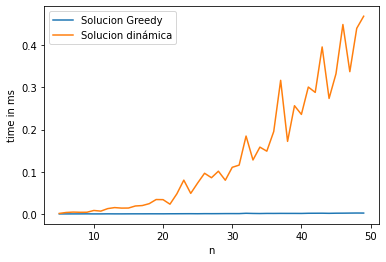

In [39]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

import random

def knapsack_instance_generator(N):
  val = []
  wt = []
  prev_v = 0
  prev_w = 0
  for i in range(N):
    v = random.randint(1, 100)
    val.append(prev_v + v)
    prev_v += v
    
    w = random.randint(1, 10)
    wt.append(prev_w + w)
    if (v >= 50):
        prev_w += w

  W = int(sum(wt) / 2)
  return W, val, wt

x=[]; y=[]; x2=[]; y2=[]

for n in range(5,50):
  W, val, wt = knapsack_instance_generator(n)
  cont = [0]

  t = repeat(setup="from __main__ import greedy", stmt=f"greedy({W},{wt},{val},{len(val)},{cont})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import mochilaDina", stmt=f"mochilaDina({W},{wt},{val},{len(val)},{cont})", repeat=1, number=10)

  x.append(n)
  y.append(t)

  x2.append(n)
  y2.append(t2)


plt.plot(x,y)
plt.plot(x2,y2)
plt.legend(["Solucion Greedy", "Solucion dinámica"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

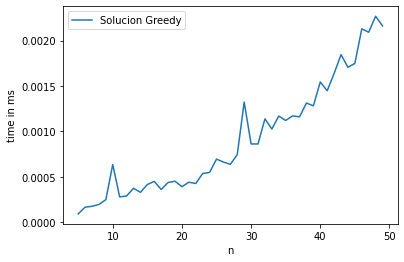

In [47]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

import random

def knapsack_instance_generator(N):
  val = []
  wt = []
  prev_v = 0
  prev_w = 0
  for i in range(N):
    v = random.randint(1, 100)
    val.append(prev_v + v)
    prev_v += v
    
    w = random.randint(1, 10)
    wt.append(prev_w + w)
    if (v >= 50):
        prev_w += w

  W = int(sum(wt) / 2)
  return W, val, wt

x=[]; y=[]; x2=[]; y2=[]

for n in range(5,50):
  W, val, wt = knapsack_instance_generator(n)
  cont = [0]

  t = repeat(setup="from __main__ import greedy", stmt=f"greedy({W},{wt},{val},{len(val)},{cont})", repeat=1, number=10)

  x.append(n)
  y.append(t)



plt.plot(x,y)
plt.legend(["Solucion Greedy", "Solucion dinámica"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

En el primer gráfico esta la comparación de ambas soluciones, mientras que en el segundo solo se muestra el de la solución greedy.

Como se puede apreciar, existe una enorme diferencia en tiempo de ejecución entre las soluciones, esto se debe a que la solución dinámica, calcula el resultado para cada tipo de combinación, y a pesar de que ya se encuentre optimizada en comparación de la solución de fuerza bruta, sigue teniendo una amplia desventaja versus la solución greedy, ya que esta solo consigue estos resultados de forma casi lineal.

En su gráfico individual se puede ver como tiene un aumento progresivo, pero si nos fijamos en el tiempo, es minúsculo el aumento del mismo, y el gráfico "exagerado" del mismo se debe principalmente al "zoom" que se le esta haciendo a los detalles más que otra cosa.

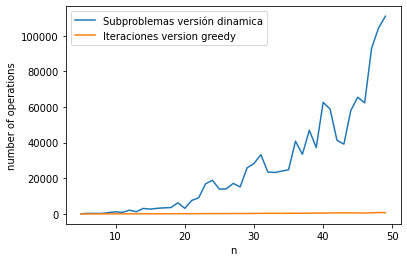

In [48]:
import matplotlib.pyplot as plt

x=[n for n in range(5,50)] 
y=[]; 
y2=[]

for n in range(5,50):
  W, val, wt = knapsack_instance_generator(n)
  cont = [0]
  cont2 = [0]

  mochilaDina(W, wt, val, len(val), cont)
  y.append(cont[0])

  greedy(W, wt, val,len(val), cont2)
  y2.append(cont2[0])

plt.plot(x,y)
plt.plot(x,y2)
plt.legend(["Subproblemas versión dinamica", "Iteraciones version greedy"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

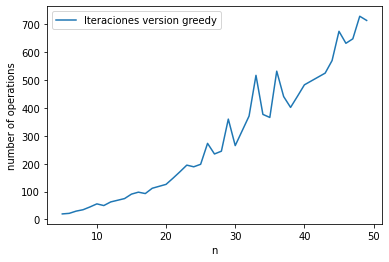

In [52]:
import matplotlib.pyplot as plt

x=[n for n in range(5,50)] 
y=[]; 
y2=[]

for n in range(5,50):
  W, val, wt = knapsack_instance_generator(n)

  cont2 = [0]

  greedy(W, wt, val,len(val), cont2)
  y2.append(cont2[0])

plt.plot(x,y2)
plt.legend(["Iteraciones version greedy"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

En el caso de las iteraciones sucede lo mismo que en el tiempo de ejecución donde la diferencia entre ambos es enorme, y se debe a los mismo motivos, ya que a medida de que aumenta la cantidad de elementos, las iteraciones que debe de hacer la solución dinámica aumenta mucho, debido a que compara cada posibilidad, mientras que el greedy es mucho más "eficiente" en estos aspectos, a pesar de que no llegue a ser tan exactos como el método dinámico.

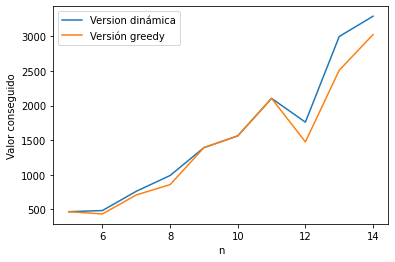

In [45]:
import matplotlib.pyplot as plt

x=[n for n in range(5,15)] 
y=[]; 
y2=[]

for n in range(5,15):
  W, val, wt = knapsack_instance_generator(n)
  W2, val2, wt2 = W, val, wt
  cont = [0]
  it = [0]

  a = mochilaDina(W, wt, val, len(val), cont)
  y.append(a)

  b = greedy(W2, wt2, val2, len(val), it)
  y2.append(b)

plt.plot(x,y)
plt.plot(x,y2)
plt.legend(["Version dinámica", "Versión greedy"])

plt.xlabel('n')
plt.ylabel('Valor conseguido')
plt.show()

Este gráfico demuestra lo que se ha mencionado antes, ya que se podría decir que la versión dinámica es la correcta, por lo que su gráfica deberia de ser la guía, y gracias a esto se puede ver como la gráfica de la versión greedy, se encuentra muy cercano a los valores dinámicos, y aunque no llegue a ser los mismos, o que se encuentre más cerca, la solución greedy compensa esto con la eficiencia que demuestra en los gráficos anteriores, donde la diferencia gigantesca.